Accuracy: 0.8725257323832145
Precision: 0.8389513108614233
Recall: 0.8565965583173997
F1-score: 0.8476821192052981


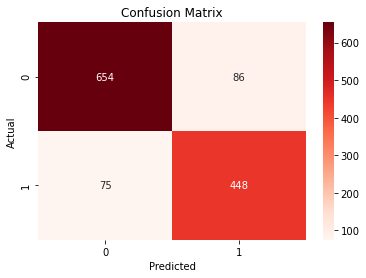

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset into a pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a DecisionTreeClassifier object with the desired hyperparameters
out = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the decision tree classifier using the training set
out.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = out.predict(X_test)

# Evaluate the performance of the model using appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

# Step 7: Evaluate the model using confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()